# Nüks Etme Tahminleme Projesi
Veri seti İzmir Katip Çelebi Üniversitesi Atatürk Eğitim ve Araştırma Hastanesi Kadın Hastalıkları ve Doğum Servisi'nden alınmıştır.
Veriler yayın aşamasında olan bir çalışmaya ait olduğu için genel kullanıma açık değildir.

# Veri Seti Özellikleri

Onkoloji hastalarının değerlerine göre oluşturulmuş olan veri setinde aşağıdaki bilgiler kayıt altına alınmıştır:
- Age : Hastanın yaşı - Numerik
- Parity : Hastanın kaç doğum yaptığı - Numerik
- Aaconcentration : Asetik Asit Konsantrasyounu - Kategorik, sadece %4 ve %8 olarak mevcut
- hpv1618vsnon : HPV enfeksiyonu pozitif çıkma veya çıkmaması, varsa hangi tip(lerin) olduğu - Kategorik
- multihpv : Birden çok HPV enfeksiyonu geçirmesi - Kategorik
- firstcvs : İlk alınan Smear sonucu - Kategorik
- colposcopy : Smear sonucuna rahim ağzından alınan biyopsi işlemi - Kategorik 
- firstcvsaftercolposcopy : Colposcopy sonrası kontrol için alınan Smear sonucu - Kategorik
- ConisationTAH : Colposcopy sonucuna göre konizasyon(rahim ağzının bir gölümünün koni şeklinde çıkartılması) yapılması ve Total Abdominal Histerektomi(rahim alınma operasyonu) - Kategorik 
- Conisationonly : Sadece konizasyon yapılması - Kategorik 
- EGCI : Rahim ağzı salgı bezlerine yayılım(Epitelial Glandular Cervical Invasion) - Kategorik 
- Surgmargpositivity : Rahim ağzı operasyonunda cerrahi sınırlarda pozitif görünüm - Kategorik 
- TAH : Total Abdominal Histerektomi(rahim alınma operasyonu) - Kategorik 
- cvsafterconisation : Konizasyon sonrası Smear sonucu - Kategorik 
- ColpConTahUyumu : Colposcopy, Konizasyon ve TAH sonuçlarının uyumları
- anteriorposterior : Ön-arka yayılım derinliği - Numerik
- transverse : Yanlara yayılım derinliği - Numerik
- deep : Dikine yayılım derinliği - Numerik
- pieces : Parça sayısı - Numerik
- nüks : Hastada kanserin tekrarlanması - Kategorik 

# Ön işleme

Ön işlemede ham veri kullanılabilecek hale getirilir. Bunun için birkaç yöntem kullanılmaktadır. Bu yöntemlere geçmeden önce nasıl bir verimiz olduğunu ve hangi modele göre eğiteceğimizi belirlememiz gerekir. 

Projedeki amacımız, elimizdeki verilerin nüks ihtimaline olan etkilerini anlamak ve buna göre bir model geliştirmek.

Bizim elimizdeki medikal veri sadece numerik verileri içermektedir. Fakat numerik olarak veriler bazı değerler kategorik olarak işlenmesi gereken veriler olduğunu yukarıdaki tanımlamalarımızda belirtmiştik.

Genel olarak herhangi bir veri setinin işlemlerde kullanılabilir hale gelmesi için aşağıdaki işlemlerden geçmesi gerekmektedir.

- Veri Standardizasyon
- Kategorik verileri sayılara dönğüştürmek
- Kayıp ve eksik verileri düzenlemek
- Çiftlenmiş verileri temizlemek
- Outlier'ları temizlemek
- Verileri train ve test olarak ayırmak

Projemizde  kullanım amaçlarına göre aşağıdaki kütüphaneler kullanılmıştır:
- Verileri işlemleri : Pandas, Numpy 
- Bulgularımızı görselleştirme : Seaborn, Matplotlib
- İstatistiksel analiz : StatsModels
- Öğrenme ve modelleme : SKlearn

In [1]:
#Kütüphaneler
import gspread as gs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from warnings import filterwarnings
filterwarnings('ignore')
%matplotlib inline

Dosya formatı olarak "Excel" yerine Google Sheets kullanarak, projenin her ortamda kurulup değerlendirilebilir olmasını sağladık.

In [2]:
sheet_id = "1n3sXrN0OlVVNAfU0H6xUkGpPS6ZZjG4eEjabLd_4SLE"
sheet_name = "patients_anonymized_not_normalized"
url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}"
try :
    df = pd.read_csv(url)
except :
    df = pd.read_csv("patients_anonymized_not_normalized.csv")
df.head()

,Age,Parity,Aaconcentration,hpv1618vsnon,multihpv,firstcvs,colposcopy,firstcvsaftercolposcopy,ConisationTAH,Conisationonly,EGCI,Surgmargpositivity,TAH,cvsafterconisation,ColpConTahUyumu,anteriorposterior,transverse,deep,pieces,nüks
0,53,2.0,4%,NONE,NONE,NORMAL,NO Displasia,NORMAL,No Conisation/TAH,No Conisation,NO EGCI,NEGATIVE,NONE,NONE,NaN,0.0,0.0,0.0,No Piece,No Conisation
1,50,NaN,4%,HPV16,ONEHPV1ONEHPVOTHER/18,NONE,NO Displasia,NONE,No Conisation/TAH,No Conisation,NO EGCI,NEGATIVE,NONE,NONE,NaN,0.0,0.0,0.0,No Piece,No Conisation
2,58,2.0,4%,HPV16,ONEHPV1ONEHPVOTHER/18,NONE,NO Displasia,ASCUS,No Conisation/TAH,No Conisation,NO EGCI,NEGATIVE,NONE,NONE,NaN,0.0,0.0,0.0,No Piece,No Conisation
3,49,1.0,4%,NONE,NONE,ASCUS,HSIL,NONE,No Conisation/TAH,No Conisation,NO EGCI,NEGATIVE,NONE,NONE,NaN,0.0,0.0,0.0,No Piece,No Conisation
4,29,3.0,4%,HPV16,ONEHPV1ONEHPVOTHER/18,NORMAL,NO Displasia,ASC-H,No Conisation/TAH,No Conisation,NO EGCI,NEGATIVE,NONE,NONE,NaN,0.0,0.0,0.0,No Piece,No Conisation


## Verilerin İncelenmesi

Pandas kütüphanesindeki iki method ile öncelikle verileri ve veri kümemizi tanıyacağız.

```DataFrame.info() ```   
Bu method ile elimizdeki DataFrame hakkında bir özet bilgi edinebiliriz.

```DataFrame.describe():```  
Bu method ile DataFrame içerisinde bulunan verilerin meta bilgilerini edinerek analizlerimize başlayabileceğiz.

```DataFrame.describe(include=("O"):```  
Bu method ile DataFrame içerisinde bulunan kategorik değişkenlerin meta bilgilerii edinerek analizlerimize başlayabileceğiz.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      720 non-null    int64  
 1   Parity                   525 non-null    float64
 2   Aaconcentration          720 non-null    object 
 3   hpv1618vsnon             712 non-null    object 
 4   multihpv                 710 non-null    object 
 5   firstcvs                 720 non-null    object 
 6   colposcopy               715 non-null    object 
 7   firstcvsaftercolposcopy  719 non-null    object 
 8   ConisationTAH            720 non-null    object 
 9   Conisationonly           719 non-null    object 
 10  EGCI                     720 non-null    object 
 11  Surgmargpositivity       720 non-null    object 
 12  TAH                      720 non-null    object 
 13  cvsafterconisation       720 non-null    object 
 14  ColpConTahUyumu          1

In [4]:
df.describe()

,Age,Parity,anteriorposterior,transverse,deep
count,720.000000,525.000000,720.000000,720.000000,720.000000
mean,44.927778,2.066667,0.389444,0.312083,0.162500
std,9.693225,1.502331,1.087800,0.861497,0.471861
min,21.000000,0.000000,0.000000,0.000000,0.000000
25%,37.000000,1.000000,0.000000,0.000000,0.000000
50%,45.000000,2.000000,0.000000,0.000000,0.000000
75%,52.000000,3.000000,0.000000,0.000000,0.000000
max,74.000000,11.000000,7.800000,6.000000,4.000000


In [5]:
df.describe(include="O").T

,count,unique,top,freq
Aaconcentration,720,2,4%,645
hpv1618vsnon,712,5,HPV16,292
multihpv,710,6,ONEHPV1ONEHPVOTHER/18,296
firstcvs,720,9,NORMAL,362
colposcopy,715,5,NO Displasia,507
firstcvsaftercolposcopy,719,7,NONE,471
ConisationTAH,720,7,No Conisation/TAH,604
Conisationonly,719,7,No Conisation,617
EGCI,720,2,NO EGCI,710
Surgmargpositivity,720,2,NEGATIVE,716


## Verilerin Görselleştirilmesi

Veriler hakkında bize yol gösterebilecek diğer bir görünüm de histogramlardır. Histogramlar, çubuk grafik biçiminde sürekli bir değişkenin olasılık dağılımının gösterilmesi için kullanılır.
Bu sebeple histogramımızı Kategorik değişkenlerimizi Numerik değerlere çevirmeden önce yorumlamamız gerekmektedir.

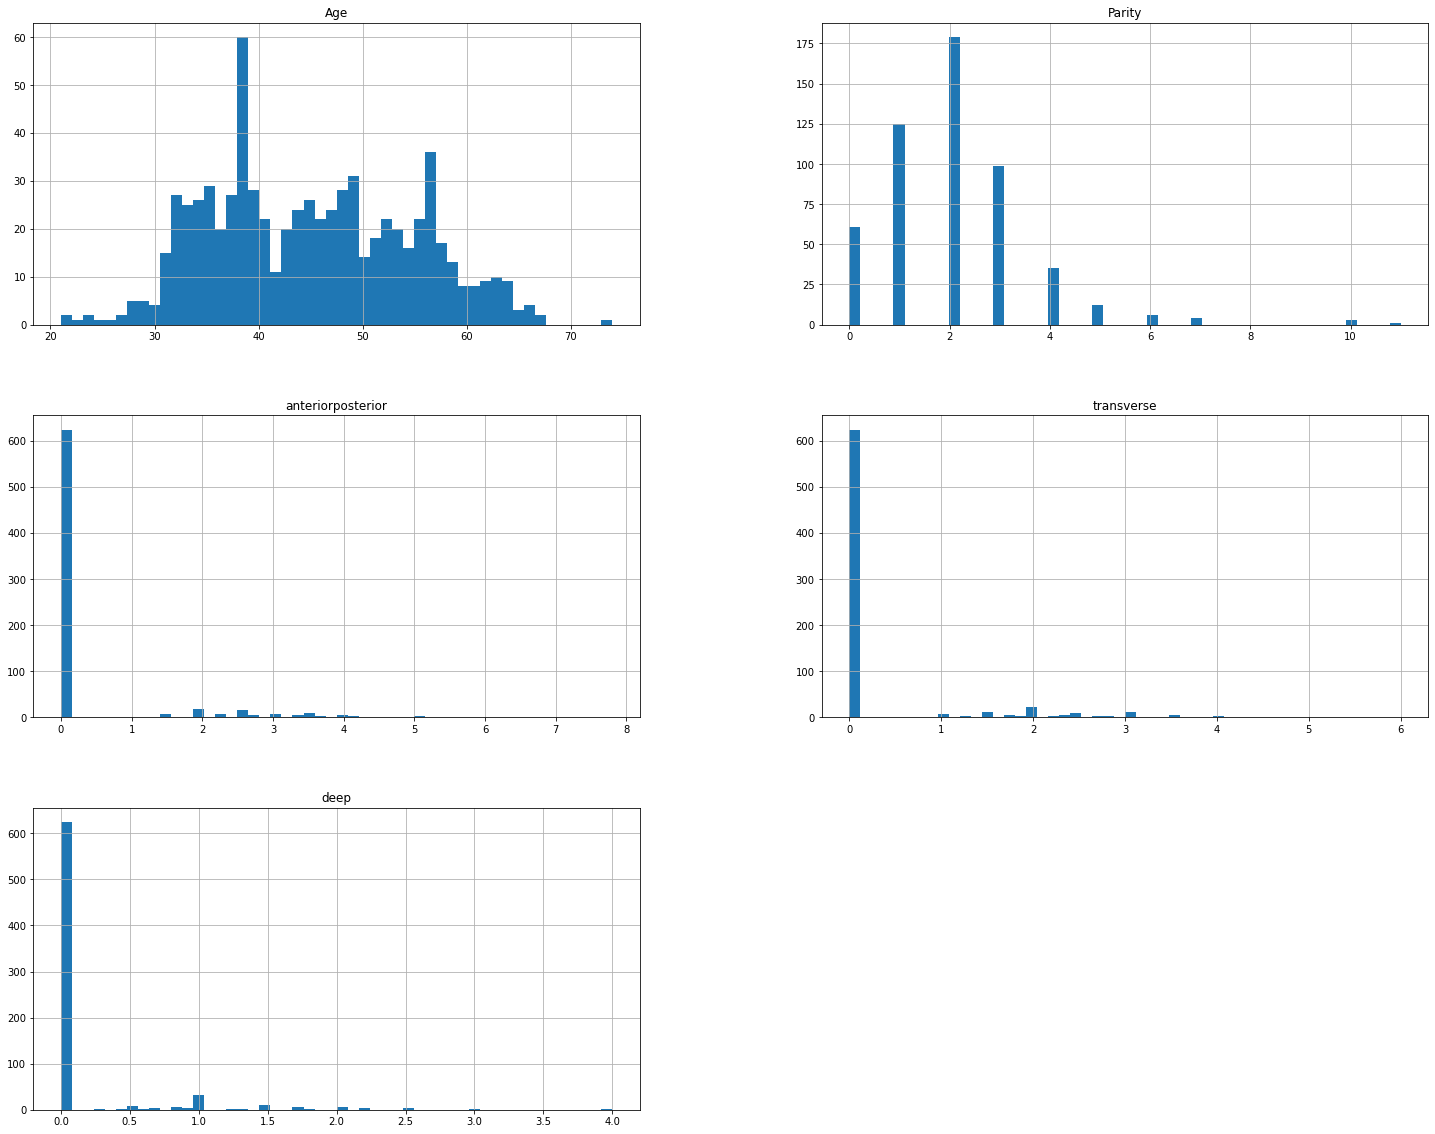

In [6]:
df.hist(bins=50, figsize=(25, 20))
plt.show()

## Çiftlenmiş verilerin temizlenmesi 
Verilerin çoklanmamış olduğundan emin olmamız için bütün veriler üzerinden geçerek bunları silmemiz gerekmekte. bunun için ```DataFrame.drop_duplicates()``` fonksiyonunu kullanacağız.

In [7]:
df.drop_duplicates(keep='first', inplace=True)

## Kategorik verilerin kodlanması

Veri setimizde birçok kategorik bilgi bulunmakta. Daha önce yaptığımız listeye bakrarak bu kategorik verileri numerik değerlere atayıp işlemlerimize devam edeceğiz.

Aşağıdaki kod parçası listelenen kategorik veri sütunları içerisinde dönerek hepsindeki değerlere numerik labellar atamaktadır. Bu numerik labelların kaybolmaması için bu verileri de Google Sheet'te ayrı ayrı tablolara yazacağız. Bu sayede ileride yeni veriler geldiğinde bu eğitilmiş modelimizi kullanmamız için gerekli haritalamayı yapabiliriz.


In [8]:
import xlsxwriter
import math
from xlsxwriter.utility import xl_range

labelsMatrix = list()


from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

categoryFieldsList = ['Aaconcentration','hpv1618vsnon','multihpv','firstcvs','colposcopy','firstcvsaftercolposcopy','ConisationTAH','Conisationonly','EGCI','Surgmargpositivity','TAH','cvsafterconisation','ColpConTahUyumu','pieces','nüks']
for item in categoryFieldsList:
    df[item] = encoder.fit_transform(df[item])
    print(f"Kolon adı {item} olan değişken için")
    label_value_matrix = []
    for id_, class_ in enumerate(encoder.classes_):
        if isinstance(class_, float) and math.isnan(class_):
            class_ = "NONE"
        print(f"'{class_}' sınıfına verilen numerik değer '{id_}' olarak belirlenmiştir")
        label_value_matrix.append([class_,id_])
    labelsMatrix.append(pd.DataFrame(label_value_matrix, columns=['label','value']))
    
writer = pd.ExcelWriter('ITU_Project_Mappings.xlsx', engine='xlsxwriter')
print(len(categoryFieldsList))
for i in range(0,len(categoryFieldsList)-1):
    workbook = writer.book
    labelsMatrix[i].to_excel(
        writer, 
        categoryFieldsList[i],
        startcol=0,
        startrow=0
    )
writer.close()

Kolon adı Aaconcentration olan değişken için
'4%' sınıfına verilen numerik değer '0' olarak belirlenmiştir
'8%' sınıfına verilen numerik değer '1' olarak belirlenmiştir
Kolon adı hpv1618vsnon olan değişken için
'HPV16' sınıfına verilen numerik değer '0' olarak belirlenmiştir
'HPV16/18' sınıfına verilen numerik değer '1' olarak belirlenmiştir
'HPV18' sınıfına verilen numerik değer '2' olarak belirlenmiştir
'NONE' sınıfına verilen numerik değer '3' olarak belirlenmiştir
'Only Other HPV' sınıfına verilen numerik değer '4' olarak belirlenmiştir
'NONE' sınıfına verilen numerik değer '5' olarak belirlenmiştir
Kolon adı multihpv olan değişken için
'HPV1ONEHPVOTHER+18' sınıfına verilen numerik değer '0' olarak belirlenmiştir
'MULTIHPV1ONEHPVOTHER/18+HPVPOTHER' sınıfına verilen numerik değer '1' olarak belirlenmiştir
'MULTIHPVOTHER' sınıfına verilen numerik değer '2' olarak belirlenmiştir
'NONE' sınıfına verilen numerik değer '3' olarak belirlenmiştir
'ONEHPV1ONEHPVOTHER/18' sınıfına verilen nu

In [9]:
df.head()

,Age,Parity,Aaconcentration,hpv1618vsnon,multihpv,firstcvs,colposcopy,firstcvsaftercolposcopy,ConisationTAH,Conisationonly,EGCI,Surgmargpositivity,TAH,cvsafterconisation,ColpConTahUyumu,anteriorposterior,transverse,deep,pieces,nüks
0,53,2.0,0,3,3,8,4,6,5,5,0,0,2,3,2,0.0,0.0,0.0,1,1
1,50,NaN,0,0,4,7,4,5,5,5,0,0,2,3,2,0.0,0.0,0.0,1,1
2,58,2.0,0,0,4,7,4,1,5,5,0,0,2,3,2,0.0,0.0,0.0,1,1
3,49,1.0,0,3,3,2,1,5,5,5,0,0,2,3,2,0.0,0.0,0.0,1,1
4,29,3.0,0,0,4,8,4,0,5,5,0,0,2,3,2,0.0,0.0,0.0,1,1


Burada dikkat edilmesi gereken nokta, öğrenme algoritmaların yakınsama eğilimi numerik değerlerin birbirlerine büyüklüklerine ve ardışık olmasına göre kullanmaktır. Bu sebeple sayısal olarak 2 ve 3 birbirine yakın bile olsa bu değerlerin karşılığı olan veri "çok iyi" ve "çok kötü" olabilir.

In [10]:
df.isnull().sum()

Age                          0
Parity                     188
Aaconcentration              0
hpv1618vsnon                 0
multihpv                     0
firstcvs                     0
colposcopy                   0
firstcvsaftercolposcopy      0
ConisationTAH                0
Conisationonly               0
EGCI                         0
Surgmargpositivity           0
TAH                          0
cvsafterconisation           0
ColpConTahUyumu              0
anteriorposterior            0
transverse                   0
deep                         0
pieces                       0
nüks                         0
dtype: int64

## Kayıp ve eksik verileri düzenlemek 

Veri kümesi içerisinde birçok kayıp veya eksik veri bulunmakta. Bu verileri "Not a Number" anlamına gelen bir sabit ile değiştirerek ilerleyeceğiz.

In [11]:
names_NONE = ['Aaconcentration','colposcopy','ConisationTAH','Conisationonly','EGCI','cvsafterconisation','nüks','anteriorposterior','transverse','deep','pieces']

for name in names_NONE:
    df[name].replace("NONE", np.nan, inplace=True)

In [12]:
df.head()

,Age,Parity,Aaconcentration,hpv1618vsnon,multihpv,firstcvs,colposcopy,firstcvsaftercolposcopy,ConisationTAH,Conisationonly,EGCI,Surgmargpositivity,TAH,cvsafterconisation,ColpConTahUyumu,anteriorposterior,transverse,deep,pieces,nüks
0,53,2.0,0,3,3,8,4,6,5,5,0,0,2,3,2,0.0,0.0,0.0,1,1
1,50,NaN,0,0,4,7,4,5,5,5,0,0,2,3,2,0.0,0.0,0.0,1,1
2,58,2.0,0,0,4,7,4,1,5,5,0,0,2,3,2,0.0,0.0,0.0,1,1
3,49,1.0,0,3,3,2,1,5,5,5,0,0,2,3,2,0.0,0.0,0.0,1,1
4,29,3.0,0,0,4,8,4,0,5,5,0,0,2,3,2,0.0,0.0,0.0,1,1


Eksik veriler bazı farklı yöntemler ile manipüle edilebilir. Akla ilk gelenler
- Eksiği olan verileri görmezden gelmek
- Eksik verilerin median ile değiştirmek
- Bütün özelliği verisetinden çıkarmak

Biz burada  ```DataFrame.fillna()``` methodunu kullanarak her NaN değerli veriyi kendine özel olan median ile yer değiştireceğiz.

In [13]:
categoryFieldsList = ['Age','Parity','transverse','nüks']
for item in categoryFieldsList:
    median = df[item].median()
    df[item].fillna(median, inplace=True)

Boş verilerin doldurulması işleminden sonra kategorik verilerin histogram grafiklerini oluşturuk.

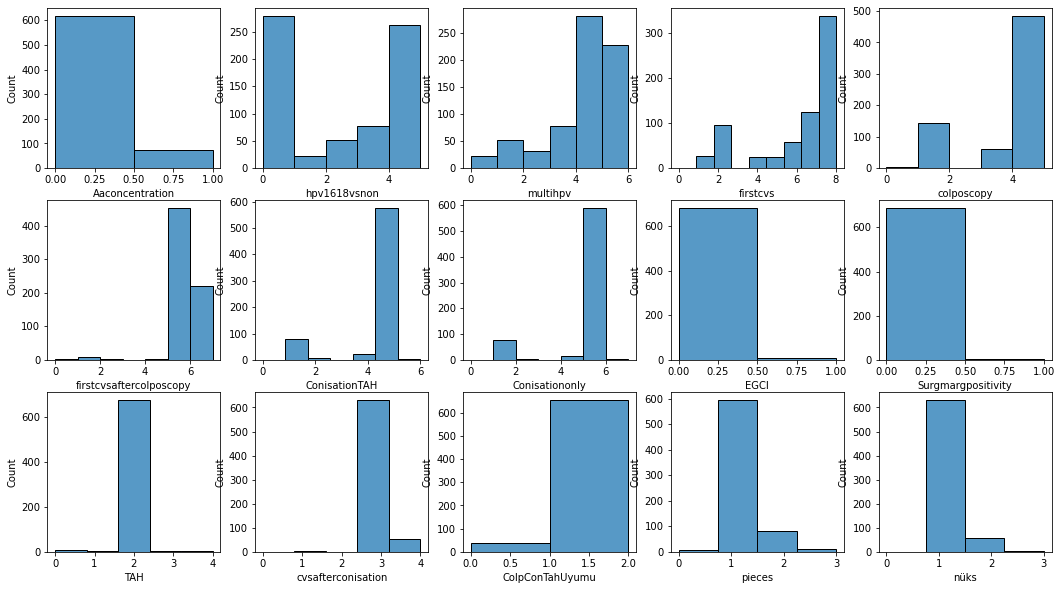

In [14]:
plt.figure(figsize=(18, 10))
plt.subplot(3,5,1)
sns.histplot(df["Aaconcentration"],bins=2)
plt.subplot(3,5,2)
sns.histplot(df["hpv1618vsnon"],bins=5)
plt.subplot(3,5,3)
sns.histplot(df["multihpv"],bins=6)
plt.subplot(3,5,4)
sns.histplot(df["firstcvs"],bins=9)
plt.subplot(3,5,5)
sns.histplot(df["colposcopy"],bins=5)
plt.subplot(3,5,6)
sns.histplot(df["firstcvsaftercolposcopy"],bins=7)
plt.subplot(3,5,7)
sns.histplot(df["ConisationTAH"],bins=7)
plt.subplot(3,5,8)
sns.histplot(df["Conisationonly"],bins=7)
plt.subplot(3,5,9)
sns.histplot(df["EGCI"],bins=2)
plt.subplot(3,5,10)
sns.histplot(df["Surgmargpositivity"],bins=2)
plt.subplot(3,5,11)
sns.histplot(df["TAH"],bins=5)
plt.subplot(3,5,12)
sns.histplot(df["cvsafterconisation"],bins=5)
plt.subplot(3,5,13)
sns.histplot(df["ColpConTahUyumu"],bins=2)
plt.subplot(3,5,14)
sns.histplot(df["pieces"],bins=4)
plt.subplot(3,5,15)
sns.histplot(df["nüks"],bins=4)
plt.show()

## Outlier Kontrolü

Verilerimiz içerisinde kirli veriler ve outlier'lar olabilir.
Bu outlier'lar hatalı veriler oluşturabilir. Bu sebeple gerek duyulursa çıkartılmalarının uygun olduğunu düşünüyoruz.

Basitçe, ```df.describe()``` fonksiyonundaki min ve max değerlerine bakarak verimizde outlier olup olmadığını görebiliriz. Eğer olası değer aralıklarının dışında bir veri mevcutsa bunları yoksaymak ileriki adımlarda daha doğru çıkarımlar yapmamızı sağlayacaktır.

Biz burada veri setimizdeki değerlerin IQR değerlerinin kontrolunü yapacağız.

In [15]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Age                        15.0
Parity                      1.0
Aaconcentration             0.0
hpv1618vsnon                4.0
multihpv                    2.0
firstcvs                    2.0
colposcopy                  1.0
firstcvsaftercolposcopy     1.0
ConisationTAH               0.0
Conisationonly              0.0
EGCI                        0.0
Surgmargpositivity          0.0
TAH                         0.0
cvsafterconisation          0.0
ColpConTahUyumu             0.0
anteriorposterior           0.0
transverse                  0.0
deep                        0.0
pieces                      0.0
nüks                        0.0
dtype: float64


Veri seti gerçek hayat problemini içerdiği için outlier temizliği yapılmadan sonraki aşamaya geçilmiştir.

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 693 entries, 0 to 719
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      693 non-null    int64  
 1   Parity                   693 non-null    float64
 2   Aaconcentration          693 non-null    int32  
 3   hpv1618vsnon             693 non-null    int32  
 4   multihpv                 693 non-null    int32  
 5   firstcvs                 693 non-null    int32  
 6   colposcopy               693 non-null    int32  
 7   firstcvsaftercolposcopy  693 non-null    int32  
 8   ConisationTAH            693 non-null    int32  
 9   Conisationonly           693 non-null    int32  
 10  EGCI                     693 non-null    int32  
 11  Surgmargpositivity       693 non-null    int32  
 12  TAH                      693 non-null    int32  
 13  cvsafterconisation       693 non-null    int32  
 14  ColpConTahUyumu          6

## Veri setinin korelasyon analizi
Korelasyon değerleri 1 ile -1 arasında bulunmaktadır. 1'e yakın veriler güçlü bir lineer korelasyon, -1'e yakın veriler güçlü bir negatif korelasyon göstergesidir.

Biz ```DataFrame.corr()``` methodu ile Pearson methodolojisi ile Linear Korelasyon martixini kolayca olauşturacağız("Spearman" farklı methodları da parametrik olarak kullanabiliriz.)

In [17]:
df.corr(method='pearson')

,Age,Parity,Aaconcentration,hpv1618vsnon,multihpv,firstcvs,colposcopy,firstcvsaftercolposcopy,ConisationTAH,Conisationonly,EGCI,Surgmargpositivity,TAH,cvsafterconisation,ColpConTahUyumu,anteriorposterior,transverse,deep,pieces,nüks
Age,1.000000,0.261923,0.024952,0.085346,0.036813,0.022567,0.084049,-0.022055,0.041029,0.036245,0.015946,-0.040356,-0.023618,0.023459,0.010299,-0.045243,-0.049227,-0.041981,-0.057835,-0.013091
Parity,0.261923,1.000000,-0.031827,0.055206,0.070702,-0.041190,-0.021535,-0.069789,-0.001578,-0.003792,0.013798,-0.017720,-0.007013,0.022648,-0.069303,0.030604,0.032162,0.041309,0.016818,0.006717
Aaconcentration,0.024952,-0.031827,1.000000,-0.010269,-0.030583,-0.101532,-0.216967,0.082891,-0.231791,-0.239397,0.074695,-0.026543,-0.019620,0.229154,-0.229941,0.280118,0.293373,0.306461,0.216322,0.282024
hpv1618vsnon,0.085346,0.055206,-0.010269,1.000000,0.351216,-0.154557,0.084172,0.038469,0.101403,0.094562,-0.029233,-0.001689,0.076144,-0.028614,0.084479,-0.092699,-0.095034,-0.095131,-0.060307,-0.043012
multihpv,0.036813,0.070702,-0.030583,0.351216,1.000000,-0.022972,-0.041565,0.004467,-0.008173,-0.019045,-0.025585,-0.044376,0.026733,0.012035,-0.021391,0.014131,0.012614,0.024907,0.021745,0.025140
firstcvs,0.022567,-0.041190,-0.101532,-0.154557,-0.022972,1.000000,0.116428,0.038249,0.068144,0.058457,0.015826,0.047464,0.029618,-0.072240,0.033854,-0.042710,-0.053230,-0.093936,-0.075877,-0.054937
colposcopy,0.084049,-0.021535,-0.216967,0.084172,-0.041565,0.116428,1.000000,0.042931,0.606770,0.584499,-0.203422,-0.094151,0.060056,-0.326745,0.438635,-0.544474,-0.555274,-0.512938,-0.462323,-0.446701
firstcvsaftercolposcopy,-0.022055,-0.069789,0.082891,0.038469,0.004467,0.038249,0.042931,1.000000,0.157415,0.153114,-0.033952,-0.069173,0.000097,-0.028044,0.270704,-0.138100,-0.123181,-0.121066,-0.143408,-0.123328
ConisationTAH,0.041029,-0.001578,-0.231791,0.101403,-0.008173,0.068144,0.606770,0.157415,1.000000,0.931192,-0.280041,-0.127501,0.260843,-0.413060,0.705756,-0.777320,-0.789084,-0.765610,-0.718955,-0.645006
Conisationonly,0.036245,-0.003792,-0.239397,0.094562,-0.019045,0.058457,0.584499,0.153114,0.931192,1.000000,-0.254943,-0.133887,-0.001859,-0.415031,0.671116,-0.823204,-0.834934,-0.812227,-0.765780,-0.655722


## Stats Model - Backward Elimination

Modelimizi son haline getirirken "nüks" değerine etki etmeyen veya etkisi az olan parametrelerin çıkartılması gerekmektedir. Bunun için iteratif olarak backward elimination methodunu kullanacağız.
Öncelikle bütün parametrelerin olduğu bir model oluşturup, bu modelden sırası ile "p" değeri "0,05"in üstünde olanları çıkartacağız.
"p" değeri "0,05"in üstünde herhangi bir değer kalmadığında bu bizim öğrenme modellerimizi için kullanacağımız veri seti olacaktır.

In [18]:
x = df.iloc[:,0:19]
y = df["nüks"]
x = sm.add_constant(x)

def is_there_exceeding_p(dataframe):
    df_transpose = dataframe.T
    for item in df_transpose:
        p_value = df_transpose[item].iloc[3]
        if p_value > 0.05 :
            return item
    return "none"

while 1:
    lm = sm.OLS(y,x)
    model = lm.fit()
    model_summary = model.summary()
    model_typed = model_summary.tables[1].as_html()
    model_DF = pd.read_html(model_typed, header=0, index_col=0)[0].sort_values(by=['P>|t|'],ascending=False)
    model_DF
    value = is_there_exceeding_p(model_DF)
    if value != "none" :
        columnList = list()
        columnList.append(value)
        print("'" + value +"', p-değeri ""0.05"" üstünde olduğu için veri setinden çıkartılmıştır.")
        x.drop(columns=columnList,inplace=True)
    else :
        break
model.summary()

'Age', p-değeri 0.05 üstünde olduğu için veri setinden çıkartılmıştır.
'multihpv', p-değeri 0.05 üstünde olduğu için veri setinden çıkartılmıştır.
'pieces', p-değeri 0.05 üstünde olduğu için veri setinden çıkartılmıştır.
'Parity', p-değeri 0.05 üstünde olduğu için veri setinden çıkartılmıştır.
'ColpConTahUyumu', p-değeri 0.05 üstünde olduğu için veri setinden çıkartılmıştır.
'Conisationonly', p-değeri 0.05 üstünde olduğu için veri setinden çıkartılmıştır.
'colposcopy', p-değeri 0.05 üstünde olduğu için veri setinden çıkartılmıştır.
'hpv1618vsnon', p-değeri 0.05 üstünde olduğu için veri setinden çıkartılmıştır.
'firstcvs', p-değeri 0.05 üstünde olduğu için veri setinden çıkartılmıştır.
'firstcvsaftercolposcopy', p-değeri 0.05 üstünde olduğu için veri setinden çıkartılmıştır.
'transverse', p-değeri 0.05 üstünde olduğu için veri setinden çıkartılmıştır.


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   nüks   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     106.8
Date:                Sun, 31 Oct 2021   Prob (F-statistic):          5.02e-115
Time:                        22:08:20   Log-Likelihood:                 124.90
No. Observations:                 693   AIC:                            -231.8
Df Residuals:                     684   BIC:                            -190.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.4900      0.109      4.483      0.000       0.275       0.705
Aaconcentration        0.0609      0.026      2.309      0.021       0.009       0.113
ConisationTAH         -0.0839      0.011     -7.499      0.000      -0.106      -0.062
EGCI                  -0.1630      0.068     -2.382      0.018      -0.297      -0.029
Surgmargpositivity    -0.3457      0.104     -3.340      0.001      -0.549      -0.142
TAH                    0.0872      0.036      2.435      0.015       0.017       0.158
cvsafterconisation     0.2510      0.027      9.356      0.000       0.198       0.304
anteriorposterior      0.0291      0.014      2.140      0.033       0.002       0.056
deep                   0.0962      0.031      3.121      0.002       0.036       0.157
==============================================================================
Omnibus:                      617.118   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            54376.269
Skew:                           3.497   Prob(JB):                         0.00
Kurtosis:                      45.828   Cond. No.                         88.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Bağımlı ve Bağımsız Değişkenlerin Seçilmesi

In [19]:
x = df[["Aaconcentration","ConisationTAH","EGCI","Surgmargpositivity","TAH","cvsafterconisation","anteriorposterior","deep"]]
y = df["nüks"]

## Test verisi oluşturmak

Eğer bir model eğitmek istiyorsak bunu farklı bir veri kümesi ile yapmamız gerekmekte. Bunu da verilerimizde başka değişiklikler yapmadan önce yapmamız gerekiyor. 

scikit-learn ile elimizdekilerin %20sinden bu veri kümesini oluşturacağız.

In [20]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.20,random_state=0)

## Tekrar Ölçütleme ve Standartlaştırma

Bazı algoritmalar ölçütlemere göre farklı performans göstermektedir.

Bunlardan biri k-nearest-neighbor algoritmasıdır. 
Bizde bu şekilde bir durum olmasa bile buna yönelik çalışmayı aşağıdaki gibi min-max scaler ile yapabiliriz.

Bu ölçütlemede bütün değerler her kolon için 0 ile 1 arasında olacak şekilde düzenlenir.
Genel olarak formülü şu şekildedir:

$x'_i = \frac{x_i - min(x)}{max(x) - min(x)}$

$min(x)$, $x$ içerisindeki en düşük değerli veriyi,
$x'_i$, $x_i$'in 0-1 arasına ölçütlenmiş halini göstermektedir.

In [21]:
from sklearn.preprocessing import MinMaxScaler

# initialize min-max scaler
mm_scaler_temp_df = df.copy()
mm_scaler = MinMaxScaler()

temp_df = df.copy()
column_names = mm_scaler_temp_df.columns.tolist()

# transform all attributes
mm_scaler_temp_df[column_names] = mm_scaler.fit_transform(mm_scaler_temp_df[column_names])

mm_scaler_temp_df.sort_index(inplace=True)
mm_scaler_temp_df.head()

,Age,Parity,Aaconcentration,hpv1618vsnon,multihpv,firstcvs,colposcopy,firstcvsaftercolposcopy,ConisationTAH,Conisationonly,EGCI,Surgmargpositivity,TAH,cvsafterconisation,ColpConTahUyumu,anteriorposterior,transverse,deep,pieces,nüks
0,0.603774,0.181818,0.0,0.6,0.500000,1.000,0.8,0.857143,0.833333,0.714286,0.0,0.0,0.5,0.75,1.0,0.0,0.0,0.0,0.333333,0.333333
1,0.547170,0.181818,0.0,0.0,0.666667,0.875,0.8,0.714286,0.833333,0.714286,0.0,0.0,0.5,0.75,1.0,0.0,0.0,0.0,0.333333,0.333333
2,0.698113,0.181818,0.0,0.0,0.666667,0.875,0.8,0.142857,0.833333,0.714286,0.0,0.0,0.5,0.75,1.0,0.0,0.0,0.0,0.333333,0.333333
3,0.528302,0.090909,0.0,0.6,0.500000,0.250,0.2,0.714286,0.833333,0.714286,0.0,0.0,0.5,0.75,1.0,0.0,0.0,0.0,0.333333,0.333333
4,0.150943,0.272727,0.0,0.0,0.666667,1.000,0.8,0.000000,0.833333,0.714286,0.0,0.0,0.5,0.75,1.0,0.0,0.0,0.0,0.333333,0.333333


Bir diğer yaklaşım da standardizasyondur. 
Bu yöntemde, veriler ortalama 0 ve standart sapma 1 olarak, normal standart dağılıma göre dağıtılır.
$x_i$ verisi için örnek hesaplama şu şekilde olacaktır:

$x'_i = \frac{x_i - mean(x)}{\sigma(x)}$

$mean(x)$, $x$'in ortalama değerini, 

$\sigma(x)$, $x$'in standart sapmasını,
$x'_i$, $x_i$ değerinin ölçütlenmiş halini göstermektedir.

In [22]:
from sklearn.preprocessing import StandardScaler

standard_scaler_temp_df = df.copy()
standard_scaler_temp_df = StandardScaler().fit_transform(standard_scaler_temp_df.values)
standard_scaler_temp_df = pd.DataFrame(standard_scaler_temp_df, index=df.index, columns=df.columns)
standard_scaler_temp_df

,Age,Parity,Aaconcentration,hpv1618vsnon,multihpv,firstcvs,colposcopy,firstcvsaftercolposcopy,ConisationTAH,Conisationonly,EGCI,Surgmargpositivity,TAH,cvsafterconisation,ColpConTahUyumu,anteriorposterior,transverse,deep,pieces,nüks
0,0.829109,-0.040012,-0.348367,0.526406,-0.582406,0.729925,0.586721,0.973925,0.400455,0.380206,-0.121001,-0.076194,0.053469,-0.198610,0.426688,-0.366089,-0.370453,-0.352085,-0.335539,-0.290489
1,0.521467,-0.040012,-0.348367,-1.119304,0.159519,0.301974,0.586721,-0.280592,0.400455,0.380206,-0.121001,-0.076194,0.053469,-0.198610,0.426688,-0.366089,-0.370453,-0.352085,-0.335539,-0.290489
2,1.341845,-0.040012,-0.348367,-1.119304,0.159519,0.301974,0.586721,-5.298660,0.400455,0.380206,-0.121001,-0.076194,0.053469,-0.198610,0.426688,-0.366089,-0.370453,-0.352085,-0.335539,-0.290489
3,0.418920,-0.810243,-0.348367,0.526406,-0.582406,-1.837781,-1.843145,-0.280592,0.400455,0.380206,-0.121001,-0.076194,0.053469,-0.198610,0.426688,-0.366089,-0.370453,-0.352085,-0.335539,-0.290489
4,-1.632025,0.730219,-0.348367,-1.119304,0.159519,0.729925,0.586721,-6.553177,0.400455,0.380206,-0.121001,-0.076194,0.053469,-0.198610,0.426688,-0.366089,-0.370453,-0.352085,-0.335539,-0.290489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,-0.914195,-0.040012,-0.348367,-1.119304,0.159519,0.729925,-1.843145,-0.280592,-2.616015,-2.728738,-0.121001,-0.076194,0.053469,2.859987,-1.468793,6.691172,5.342139,2.776056,-2.809246,3.009660
716,0.418920,-0.810243,-0.348367,1.074975,0.159519,0.729925,0.586721,-0.280592,0.400455,0.380206,-0.121001,-0.076194,0.053469,-0.198610,0.426688,-0.366089,-0.370453,-0.352085,-0.335539,-0.290489
717,0.316372,-0.810243,-0.348367,1.074975,-1.324331,0.729925,0.586721,-0.280592,0.400455,0.380206,-0.121001,-0.076194,0.053469,-0.198610,0.426688,-0.366089,-0.370453,-0.352085,-0.335539,-0.290489
718,0.008731,-0.040012,-0.348367,1.074975,-1.324331,0.729925,-0.223234,-0.280592,-2.616015,-2.728738,-0.121001,-0.076194,0.053469,2.859987,-3.364274,1.986331,1.800332,3.818769,2.138168,3.009660


Modelimizde standart scaler metodunu kullandık.

In [23]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)
#sc.inverse_transform()

## Lojistik Regresyon Modeli 
Lojistik regresyon bir sınıfın var olma olasılığının modellenmesi için kullanılan bir yöntemdir.
"Multinomial Logistic Regression", lojistik regresyonu çoklu sınıf problemleri olarak yorumlayan bir sınıflama yöntemidir.

Bizim veri setimizdeki kategorik veriler ikili(var/yok) şekilde olmadığı için, "Multinomial Logistic Regression" modelinin uygulanması daha doğru olacaktır.

R-kare değeri, bir değişkenin varyansının ikinci değişkenin varyansını ne ölçüde açıkladığını belirtir. Daha yüksek bir R-kare değeri, girdi değişkenlerinin daha fazla varyasyonu açıklayabildiği anlamına gelmektedir.

Train R'2 = 0.9964
Test R'2 = 0.9928
              precision    recall  f1-score   support

           1       1.00      0.99      1.00       125
           2       1.00      1.00      1.00        13
           3       0.50      1.00      0.67         1

    accuracy                           0.99       139
   macro avg       0.83      1.00      0.89       139
weighted avg       1.00      0.99      0.99       139



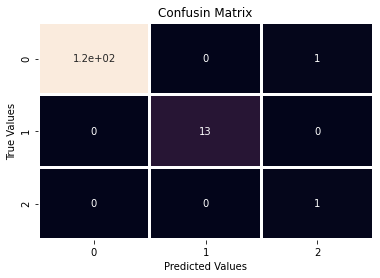

In [24]:
from sklearn.metrics import accuracy_score , confusion_matrix
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression(multi_class='multinomial', solver='lbfgs')
logr.fit(X_train,y_train)
y_pred1 = logr.predict(X_test)

## Karmaşıklık Matrisi
## Başarı Oranı
print("Train R'2 = "+str(logr.score(X_train,y_train).round(4)))
print("Test R'2 = "+str(accuracy_score(y_test, y_pred1).round(4)))
print(classification_report(y_test, y_pred1))
sns.heatmap(confusion_matrix(y_test,y_pred1),annot=True,lw=2,cbar=False)
plt.ylabel("True Values")
plt.xlabel("Predicted Values")
plt.title("Confusin Matrix")
plt.show()

## SGD 

Gradyan Azalma, rastgele alınan değişkenlerle başlayarak global minimum değerine ulaşmayı amaçlar. Bizim kullandığımız Stokastik Gradyan Azalma'da ise, her adımda rastgele alınan 1 veri üzerinde işlem yapılır Alınan noktalar devamlı olarak değişerek en iyi noktaya ulaşmaya çalışılır.

Train R'2 = 0.9892
Test R'2 = 0.9928
              precision    recall  f1-score   support

           1       0.99      1.00      1.00       125
           2       1.00      1.00      1.00        13
           3       0.00      0.00      0.00         1

    accuracy                           0.99       139
   macro avg       0.66      0.67      0.67       139
weighted avg       0.99      0.99      0.99       139



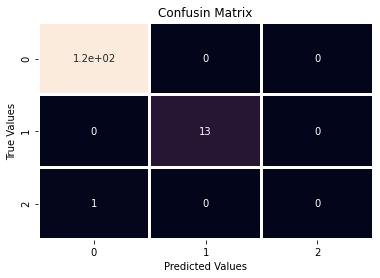

In [25]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier()
sonuc = clf.fit(X_train,y_train)
y_pred2 = clf.predict(X_test)

## Karmaşıklık Matrisi
## Başarı Oranı
print("Train R'2 = "+str(clf.score(X_train,y_train).round(4)))
print("Test R'2 = "+str(accuracy_score(y_test, y_pred2).round(4)))
print(classification_report(y_test, y_pred2))
sns.heatmap(confusion_matrix(y_test,y_pred2),annot=True,lw=2,cbar=False)
plt.ylabel("True Values")
plt.xlabel("Predicted Values")
plt.title("Confusin Matrix")
plt.show()

## Karar Ağaçları 

Karar Ağacı bir "Gözetimli Öğrenme" algoritmasıdır. Kararları oluşturabilmek için bir kural seti kullnır. Bu yapısı ile, insanların karar verme mekanizmasına benzemektedir.


Train R'2 = 1.0
Test R'2 = 1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       125
           2       1.00      1.00      1.00        13
           3       1.00      1.00      1.00         1

    accuracy                           1.00       139
   macro avg       1.00      1.00      1.00       139
weighted avg       1.00      1.00      1.00       139



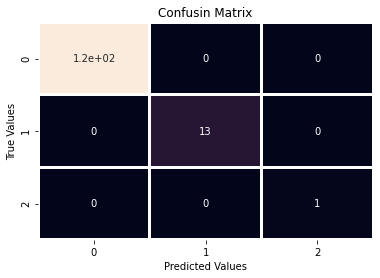

In [26]:
#criterion{“gini”, “entropy”}, default=”gini”
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion="entropy")
dtc.fit(X_train,y_train)
y_pred3 = dtc.predict(X_test)

## Karmaşıklık Matrisi
## Başarı Oranı
print("Train R'2 = "+str(dtc.score(X_train,y_train).round(4)))
print("Test R'2 = "+str(accuracy_score(y_test, y_pred3).round(4)))
print(classification_report(y_test, y_pred3))
sns.heatmap(confusion_matrix(y_test,y_pred3),annot=True,lw=2,cbar=False)
plt.ylabel("True Values")
plt.xlabel("Predicted Values")
plt.title("Confusin Matrix")
plt.show()

Verilerimizi düzenleyerek üç farklı modelde kullandık.
Bu modellerde $R^{2}$'ye bakarak en iyiden en kötüye doğru sıralamamızı yaparsak:
- Karar Ağaçları
    - Train $R^{2}$ = 1.0
    - Test $R^{2}$ = 1.0
- Multinomial Logistic Regression
    - Train $R^{2}$ = 0.9964
    - Test $R^{2}$ = 0.9928
- Stokastik Gradyan Azalma
    - Train $R^{2}$ = 0.9874
    - Test $R^{2}$ = 0.9928

Sonraki adımlarda olarak, yeni verilere ulaşıldığı zaman; çalışmamızın başında yaptığımız şekilde veri kümesini işledikten sonra, yukarıda oluşturduğumuz kategori-numerik haritalamamızı da ekleyerek oluşturduğumuz yeni veri setini modellerimize Test Seti olarak uygulayabiliriz. Ortaya çıkan sonuçlar ışığında, gerekiyorsa modelimizi güncelleyebilir veya yeni modeller kurgulayabiliriz.